<a href="https://colab.research.google.com/github/Vanitha-Jain/capstone/blob/Feature-selection-new/MFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv('/content/Morgan_fingerprint.csv')
data

,molecule_chembl_id,FP_0,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,...,FP_2039,FP_2040,FP_2041,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047,bioactivity_class
0,CHEMBL167155,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1,CHEMBL166740,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
2,CHEMBL165038,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
3,CHEMBL435857,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
4,CHEMBL352783,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,CHEMBL5429863,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1225,CHEMBL5436920,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1226,CHEMBL5405698,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1227,CHEMBL5416562,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


In [2]:
data.dtypes

,0
molecule_chembl_id,object
FP_0,int64
FP_1,int64
FP_2,int64
FP_3,int64
...,...
FP_2044,int64
FP_2045,int64
FP_2046,int64
FP_2047,int64


In [3]:
data['bioactivity_class'].replace('active', 'P', inplace=True)
data['bioactivity_class'].replace('inactive', 'N', inplace=True)
data.rename(columns = {"bioactivity_class": "class"}, inplace = True)
data

<ipython-input-3-d75cbf56e791>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bioactivity_class'].replace('active', 'P', inplace=True)
<ipython-input-3-d75cbf56e791>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,molecule_chembl_id,FP_0,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,...,FP_2039,FP_2040,FP_2041,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047,class
0,CHEMBL167155,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
1,CHEMBL166740,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
2,CHEMBL165038,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
3,CHEMBL435857,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
4,CHEMBL352783,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,CHEMBL5429863,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
1225,CHEMBL5436920,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
1226,CHEMBL5405698,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
1227,CHEMBL5416562,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N


In [4]:
data['class'].replace('P', '1', inplace=True)
data['class'].replace('N', '0', inplace=True)
data.rename(columns = {"class": "class"}, inplace = True)
data

<ipython-input-4-546e5797bc7a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['class'].replace('P', '1', inplace=True)
<ipython-input-4-546e5797bc7a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

,molecule_chembl_id,FP_0,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,...,FP_2039,FP_2040,FP_2041,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047,class
0,CHEMBL167155,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL166740,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL165038,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL435857,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL352783,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,CHEMBL5429863,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1225,CHEMBL5436920,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1226,CHEMBL5405698,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1227,CHEMBL5416562,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.isnull().sum().sum()

0

In [6]:
data.dropna(inplace =True)
data.isnull().sum().sum()

0

In [7]:
data1 = data.iloc[:,1:2049]
data1
data2 = data.iloc[:,-1]

In [8]:
data1
data2

,class
0,0
1,0
2,0
3,0
4,0
...,...
1224,0
1225,0
1226,0
1227,0


In [9]:

from sklearn.feature_selection import VarianceThreshold
threshold = VarianceThreshold(threshold=.1)
def variance_threshold_selector(data1, threshold=0.10):
    selector = VarianceThreshold(threshold)
    selector.fit(data1)
    return data[data1.columns[selector.get_support(indices=True)]]
data1_HV = variance_threshold_selector(data1)

In [10]:
data1_HV = variance_threshold_selector(data1)
data1_HV

,FP_1,FP_45,FP_80,FP_114,FP_191,FP_249,FP_283,FP_294,FP_314,FP_322,...,FP_1816,FP_1823,FP_1825,FP_1855,FP_1866,FP_1911,FP_1917,FP_1928,FP_1956,FP_1970
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [11]:
data2_HV = pd.merge(data1_HV,data2,left_index=True,right_index=True)
data2_HV

,FP_1,FP_45,FP_80,FP_114,FP_191,FP_249,FP_283,FP_294,FP_314,FP_322,...,FP_1823,FP_1825,FP_1855,FP_1866,FP_1911,FP_1917,FP_1928,FP_1956,FP_1970,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1225,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1226,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1227,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [13]:

## remove features that display high correlation with many othe features
correlated_features_1 = set()
corr_matrix_class = data2_HV.corr(numeric_only=True)


for i in range(len(corr_matrix_class.columns)):
    for j in range(i):
        if abs(corr_matrix_class.iloc[i, j]) > 0.8:
            colname = corr_matrix_class.columns[i]
            correlated_features_1.add(colname)
correlated_features_1


{'FP_1536', 'FP_1683', 'FP_1970', 'FP_283'}

In [14]:
def remove_correlated_features(features, data):
    for x in features:
        data.drop(x, axis=1, inplace=True)
    return data


In [15]:
data3= remove_correlated_features(correlated_features_1, data2_HV)
data3

,FP_1,FP_45,FP_80,FP_114,FP_191,FP_249,FP_294,FP_314,FP_322,FP_350,...,FP_1816,FP_1823,FP_1825,FP_1855,FP_1866,FP_1911,FP_1917,FP_1928,FP_1956,class
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [16]:
data3.to_csv('MFS2.csv')

In [17]:
X = data3.iloc[:,1:73]  #independent columns
X
y = data3.iloc[:,-1]
y   #target column i.e price range


,class
0,0
1,0
2,0
3,0
4,0
...,...
1224,0
1225,0
1226,0
1227,0


In [18]:
X

,FP_45,FP_80,FP_114,FP_191,FP_249,FP_294,FP_314,FP_322,FP_350,FP_352,...,FP_1754,FP_1816,FP_1823,FP_1825,FP_1855,FP_1866,FP_1911,FP_1917,FP_1928,FP_1956
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [19]:
from sklearn.preprocessing import StandardScaler
# y = data['class']
# X_features =data.drop(columns='class')
scaler = StandardScaler()
X_transform = scaler.fit_transform(X)
X_transform_pd = pd.DataFrame(X_transform, columns = X.columns)
X_transform_pd

# #Standardize/normalize the data
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# X_transform = sc.fit_transform(X)
# X_transform


,FP_45,FP_80,FP_114,FP_191,FP_249,FP_294,FP_314,FP_322,FP_350,FP_352,...,FP_1754,FP_1816,FP_1823,FP_1825,FP_1855,FP_1866,FP_1911,FP_1917,FP_1928,FP_1956
0,-0.377085,-1.315717,-0.362872,-0.359994,-0.45657,-0.455268,-0.769395,-0.56952,2.360549,-0.452661,...,-0.416929,-0.473396,-0.371434,-0.427631,-0.712724,-0.393796,-0.386875,0.942266,-0.486229,-0.357104
1,-0.377085,-1.315717,-0.362872,-0.359994,-0.45657,-0.455268,-0.769395,-0.56952,2.360549,-0.452661,...,-0.416929,-0.473396,-0.371434,-0.427631,-0.712724,-0.393796,-0.386875,0.942266,-0.486229,-0.357104
2,-0.377085,-1.315717,-0.362872,-0.359994,-0.45657,-0.455268,-0.769395,-0.56952,2.360549,-0.452661,...,-0.416929,-0.473396,-0.371434,-0.427631,-0.712724,-0.393796,-0.386875,0.942266,-0.486229,-0.357104
3,-0.377085,-1.315717,-0.362872,-0.359994,-0.45657,-0.455268,-0.769395,-0.56952,2.360549,-0.452661,...,-0.416929,-0.473396,-0.371434,-0.427631,-0.712724,-0.393796,-0.386875,0.942266,-0.486229,-0.357104
4,-0.377085,-1.315717,-0.362872,-0.359994,-0.45657,-0.455268,-0.769395,-0.56952,2.360549,-0.452661,...,-0.416929,-0.473396,2.692271,-0.427631,-0.712724,-0.393796,-0.386875,0.942266,-0.486229,-0.357104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,-0.377085,-1.315717,-0.362872,-0.359994,-0.45657,-0.455268,-0.769395,-0.56952,-0.423630,-0.452661,...,-0.416929,-0.473396,-0.371434,-0.427631,1.403068,2.539387,-0.386875,-1.061272,-0.486229,-0.357104
1225,-0.377085,-1.315717,-0.362872,-0.359994,-0.45657,-0.455268,-0.769395,-0.56952,-0.423630,-0.452661,...,-0.416929,-0.473396,-0.371434,-0.427631,1.403068,2.539387,-0.386875,-1.061272,-0.486229,-0.357104
1226,-0.377085,-1.315717,-0.362872,-0.359994,-0.45657,-0.455268,-0.769395,-0.56952,-0.423630,-0.452661,...,-0.416929,-0.473396,-0.371434,-0.427631,1.403068,2.539387,-0.386875,-1.061272,-0.486229,-0.357104
1227,-0.377085,-1.315717,-0.362872,-0.359994,-0.45657,-0.455268,-0.769395,-0.56952,-0.423630,-0.452661,...,-0.416929,-0.473396,-0.371434,-0.427631,1.403068,2.539387,-0.386875,-1.061272,-0.486229,-0.357104


In [20]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
kBest = SelectKBest(mutual_info_classif, k = 15)
X_kBestFeatures = kBest.fit_transform(X, y)
X_kBestFeatures.shape

(1229, 15)

In [21]:
kBest.get_support(True)

array([ 4, 10, 15, 21, 23, 26, 27, 29, 30, 35, 45, 46, 56, 57, 63])

In [22]:
X_kBestFeatures = X.iloc[:, kBest.get_support(True)]
X_kBestFeatures.columns

Index(['FP_249', 'FP_361', 'FP_650', 'FP_699', 'FP_781', 'FP_841', 'FP_875',
       'FP_935', 'FP_980', 'FP_1060', 'FP_1224', 'FP_1236', 'FP_1480',
       'FP_1535', 'FP_1816'],
      dtype='object')

In [23]:

f = kBest.get_support(1)
X_new = X[X.columns[f]]
X_new
data_scores = pd.DataFrame(kBest.scores_)
data_columns = pd.DataFrame(X.columns)

In [24]:
#Concat two dataframes for better visualization
featureScores = pd.concat([data_columns, data_scores], axis = 1)

#naming the dataframe columns
featureScores.columns = ['Features', 'Scores']
featureScores

,Features,Scores
0,FP_45,0.000000
1,FP_80,0.000000
2,FP_114,0.015089
3,FP_191,0.004442
4,FP_249,0.056592
...,...,...
67,FP_1866,0.000000
68,FP_1911,0.000000
69,FP_1917,0.021896
70,FP_1928,0.000429


In [25]:

#Print top 15 best features
print(featureScores.nlargest(15, 'Scores'))


   Features    Scores
26   FP_841  0.059040
4    FP_249  0.056592
10   FP_361  0.048067
45  FP_1224  0.039353
63  FP_1816  0.035771
27   FP_875  0.035514
30   FP_980  0.035154
46  FP_1236  0.031615
56  FP_1480  0.030969
29   FP_935  0.030702
21   FP_699  0.029225
57  FP_1535  0.026358
35  FP_1060  0.026180
23   FP_781  0.024671
15   FP_650  0.024304


In [26]:
Graph = (featureScores.nlargest(15, 'Scores'))
Graph

,Features,Scores
26,FP_841,0.059040
4,FP_249,0.056592
10,FP_361,0.048067
45,FP_1224,0.039353
63,FP_1816,0.035771
27,FP_875,0.035514
30,FP_980,0.035154
46,FP_1236,0.031615
56,FP_1480,0.030969
29,FP_935,0.030702


In [27]:
Graph.to_csv('MFS2_Features.csv')

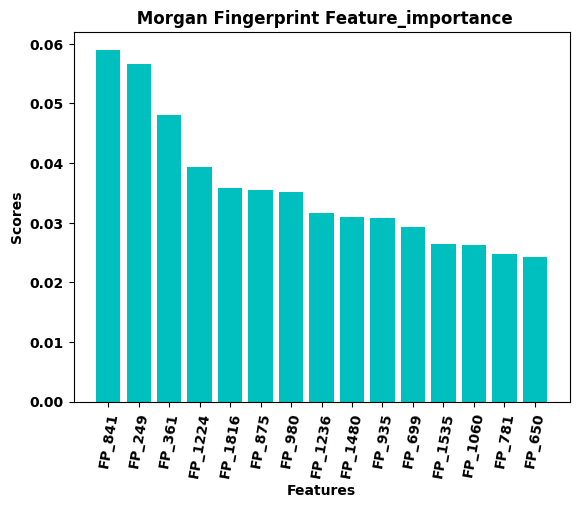

<Figure size 1000x1000 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
data = pd.read_csv('MFS2_Features.csv')
df = pd.DataFrame(data)
X = list(df.iloc[:, 1])
Y = list(df.iloc[:, 2])
plt.bar(X, Y, color='c')
plt.title(" Morgan Fingerprint Feature_importance", fontweight="bold")
plt.xlabel("Features", fontweight = 'bold')
plt.ylabel("Scores", fontweight = 'bold')
plt.xticks(rotation = 80, fontweight="bold")
plt.yticks(fontweight="bold")
fig = plt.figure(figsize=(10, 10))
plt.savefig("Features.jpg", bbox_inches = 'tight')

In [29]:
MFS2 = pd.concat([X_new,y],axis=1)
MFS2

,FP_249,FP_361,FP_650,FP_699,FP_781,FP_841,FP_875,FP_935,FP_980,FP_1060,FP_1224,FP_1236,FP_1480,FP_1535,FP_1816,class
0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
3,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1226,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:

MFS2.to_csv('MFS2_after_feature.csv')